
# NON GRADED LINEAR REGRESSION


Muhammad Farhan Zahirsyah

Batch 10

---


## Assignment

- Lakukan cleaning dan preprocessing terhadap data yang akan dipakai
- Buat sebuah classification model dengan menggunakan Logistic Regression dengan stroke prediction sebagai target


## Import Library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Statsmodels Version:',sm.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)

Pandas Version     : 1.3.4
Numpy Version      : 1.20.3
Statsmodels Version: 0.12.2
Matplotlib Version : 3.4.3
Seaborn Version    : 0.11.2
Sklearn Version    : 0.24.2


In [3]:
health_df_ori = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [4]:
health_df_ori.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
num_cols = health_df_ori.select_dtypes(include=np.number).columns.tolist()
cat_cols = health_df_ori.select_dtypes(include=['object']).columns.tolist()
health_df_ori[num_cols].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
health_df_ori[cat_cols].describe()


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
health_df_ori.shape

(5110, 12)

In [8]:
health_df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
health_df_ori.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
health_df = health_df_ori.copy()


num_cols = health_df_ori.select_dtypes(include=np.number).columns.tolist()
cat_cols = health_df_ori.select_dtypes(include=['object']).columns.tolist()

In [11]:
df_inf = health_df.sample(10,random_state=25)
df_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
930,37290,Male,80.0,0,0,Yes,Self-employed,Rural,236.84,26.8,never smoked,0
2942,32522,Male,19.0,0,0,No,Private,Urban,103.92,24.1,Unknown,0
3806,53217,Female,18.0,0,0,No,Private,Rural,92.71,24.1,Unknown,0
3954,62990,Female,55.0,0,0,Yes,Govt_job,Rural,99.64,20.1,formerly smoked,0
651,12662,Male,74.0,1,0,Yes,Self-employed,Urban,112.54,27.7,formerly smoked,0
853,62332,Female,40.0,0,0,Yes,Private,Rural,74.51,36.6,never smoked,0
920,22952,Female,21.0,0,0,No,Govt_job,Urban,111.61,36.9,smokes,0
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
1001,46875,Male,35.0,0,0,Yes,Private,Urban,145.23,32.3,never smoked,0
3858,59540,Female,19.0,0,0,No,Private,Rural,56.85,21.1,never smoked,0


In [12]:
df_train_test = health_df.drop(df_inf.index)
df_train_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,37290,Male,80.0,0,0,Yes,Self-employed,Rural,236.84,26.8,never smoked,0
1,32522,Male,19.0,0,0,No,Private,Urban,103.92,24.1,Unknown,0
2,53217,Female,18.0,0,0,No,Private,Rural,92.71,24.1,Unknown,0
3,62990,Female,55.0,0,0,Yes,Govt_job,Rural,99.64,20.1,formerly smoked,0
4,12662,Male,74.0,1,0,Yes,Self-employed,Urban,112.54,27.7,formerly smoked,0


In [14]:
x = df_train_test.drop(columns=['stroke'])
y = df_train_test['stroke']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print('Train size :',x_train.shape)
print('Test size  :',x_test.shape)

Train size : (4080, 11)
Test size  : (1020, 11)


[Text(0.5, 1.0, 'BMI')]

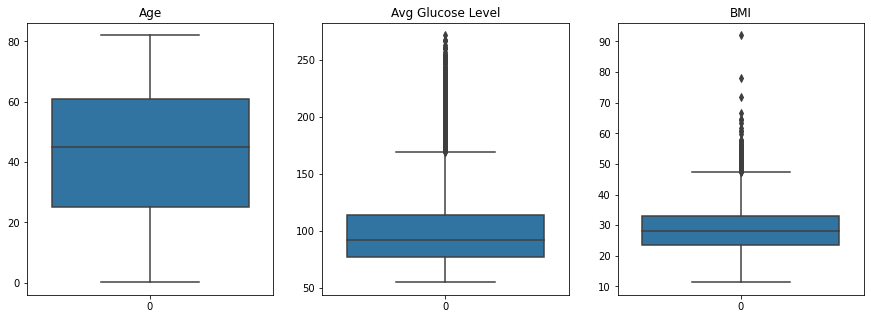

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=x_train['age'],ax=ax[0]).set(title='Age')
sns.boxplot(data=x_train['avg_glucose_level'],ax=ax[1]).set(title='Avg Glucose Level')
sns.boxplot(data=x_train['bmi'],ax=ax[2]).set(title='BMI')

[Text(0.5, 1.0, 'BMI')]

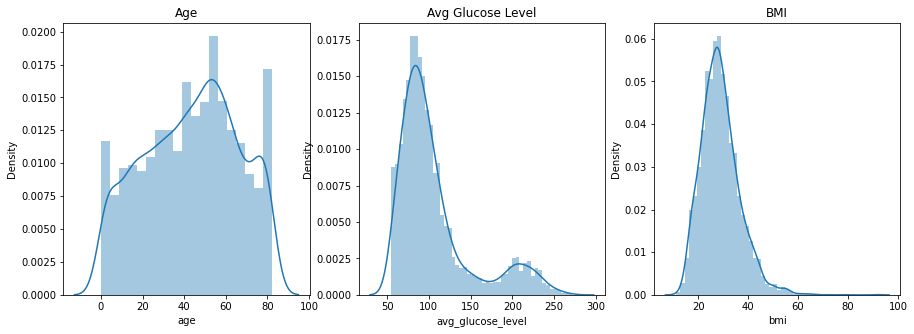

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.distplot(x_train['age'],ax=ax[0]).set(title='Age')
sns.distplot(x_train['avg_glucose_level'],ax=ax[1]).set(title='Avg Glucose Level')
sns.distplot(x_train['bmi'],ax=ax[2]).set(title='BMI')

In [18]:
num_cols = x_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

In [19]:
x_train[num_cols].skew(skipna=True)

id                  -0.017866
age                 -0.140720
hypertension         2.732711
heart_disease        3.972864
avg_glucose_level    1.560624
bmi                  0.979849
dtype: float64

BMI nilainya didalam -1 sampai 1 artinya moderately skewed. maka akan dilakukan imputation dengan menggunakan median.

In [20]:
median_x_train = x_train['age'].median()
x_train['bmi'].replace(np.nan,median_x_train,inplace=True)
x_train.drop(columns=['id'],inplace=True)
x_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [21]:
x_test['bmi'].replace(np.nan,median_x_train,inplace=True)
x_test.drop(columns=['id'],inplace=True)
x_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [25]:
num_cols = x_train.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
scaler.fit(x_train[num_cols])
x_train_num_scaled = scaler.transform(x_train[num_cols])
x_test_num_scaled = scaler.transform(x_test[num_cols])

In [26]:
encoder = OrdinalEncoder()
encoder.fit(x_train[cat_cols])
x_train_cat_encoded = encoder.transform(x_train[cat_cols])
x_test_cat_encoded = encoder.transform(x_test[cat_cols])

In [29]:
x_train_final  = np.concatenate((x_train_num_scaled,x_train_cat_encoded),axis=1)
x_test_final  = np.concatenate((x_test_num_scaled,x_test_cat_encoded),axis=1)
x_train_final_df = pd.DataFrame(x_train_final,columns=num_cols+cat_cols)
x_train_final_df


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,-1.297855,-0.326942,-0.237587,1.212037,-1.268251,1.0,0.0,1.0,0.0,0.0
1,-1.652489,-0.326942,-0.237587,-0.621158,-1.231732,0.0,0.0,4.0,1.0,0.0
2,-0.499930,-0.326942,-0.237587,0.298310,0.168130,1.0,1.0,2.0,1.0,3.0
3,0.962932,-0.326942,-0.237587,0.053207,0.484620,0.0,1.0,2.0,0.0,0.0
4,-0.100968,-0.326942,-0.237587,0.876400,0.046403,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
4075,-0.499930,-0.326942,-0.237587,-0.597310,-0.367470,0.0,0.0,2.0,1.0,1.0
4076,1.406224,-0.326942,4.208990,3.028230,-0.306606,0.0,1.0,3.0,0.0,2.0
4077,1.317565,3.058648,4.208990,-0.861404,0.399411,0.0,1.0,0.0,1.0,1.0
4078,0.120678,-0.326942,-0.237587,-0.453782,0.947183,1.0,1.0,2.0,1.0,2.0


In [32]:
model_logreg = LogisticRegression()
model_logreg.fit(x_train_final,y_train)

LogisticRegression()

In [33]:
y_pred_train = model_logreg.predict(x_train_final)
y_pred_test = model_logreg.predict(x_test_final)

In [34]:
print('Mean Absolute Error on Train Data :',mean_absolute_error(y_train,y_pred_train))
print('Mean Absolute Error on Test Data :',mean_absolute_error(y_test,y_pred_test))

Mean Absolute Error on Train Data : 0.04877450980392157
Mean Absolute Error on Test Data : 0.04803921568627451


In [36]:
df_inf_num_scaled = scaler.transform(df_inf[num_cols])
df_inf_cat_encoded = encoder.transform(df_inf[cat_cols])

df_inf_final  = np.concatenate((df_inf_num_scaled,df_inf_cat_encoded),axis=1)
df_inf_final_df = pd.DataFrame(df_inf_final,columns=num_cols+cat_cols)
df_inf_final_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,1.627869,-0.326942,-0.237587,2.880506,-0.330952,1.0,1.0,3.0,0.0,2.0
1,-1.076210,-0.326942,-0.237587,-0.054550,-0.659615,1.0,0.0,2.0,1.0,0.0
2,-1.120539,-0.326942,-0.237587,-0.302083,-0.659615,0.0,0.0,2.0,0.0,0.0
3,0.519640,-0.326942,-0.237587,-0.149059,-1.146523,0.0,1.0,0.0,0.0,1.0
4,1.361894,3.058648,-0.237587,0.135791,-0.221397,1.0,1.0,3.0,1.0,1.0
5,-0.145297,-0.326942,-0.237587,-0.703964,0.861974,0.0,1.0,2.0,0.0,2.0
6,-0.987551,-0.326942,-0.237587,0.115255,0.898492,0.0,0.0,0.0,1.0,3.0
7,1.184578,-0.326942,-0.237587,2.543544,2.188800,0.0,1.0,2.0,1.0,2.0
8,-0.366943,-0.326942,-0.237587,0.857631,0.338548,1.0,1.0,2.0,1.0,2.0
9,-1.076210,-0.326942,-0.237587,-1.093921,-1.024796,0.0,0.0,2.0,0.0,2.0


In [37]:
y_pred_inf = model_logreg.predict(df_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['Stroke - Prediction'])
y_pred_inf_df

,Stroke - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [47]:
print('accuracy_score in train data:',accuracy_score(y_train,y_pred_train))
print('accuracy_score in test data :',accuracy_score(y_test,y_pred_test))
print('accuracy_score in inf data :',accuracy_score(df_inf['stroke'],y_pred_inf))


accuracy_score in train data: 0.9512254901960784
accuracy_score in test data : 0.9519607843137254
accuracy_score in inf data : 0.9
